In [449]:
"""FINAL
Grade 285/300
Assembling the dataset: 60/60 points
Cleaning and organizing the dataset: 60/60 points
Exploratory analysis of the dataset: 55/60 points)
Visualizing the dataset: 55/60 points)
Synthesis and Analysis of the dataset: 55/60 points"""

In [450]:
import os
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn

In [451]:
path = os.getcwd()
files = os.listdir(path)
files

['Fullset.csv',
 '2019Permit.xlsx',
 'Untitled1.ipynb',
 '.DS_Store',
 'Untitled.ipynb',
 '2016Permit.xlsx',
 '2021Permit.xlsx',
 'FINAL.ipynb',
 '2015Permit.xlsx',
 '2018Permit.xlsx',
 '.ipynb_checkpoints',
 '2017Permit.xlsx',
 '2020Permit.xlsx',
 'Ones I can look at']

In [452]:
files_xls = [f for f in files if f[-4:] == 'xlsx']
files_xls

['2019Permit.xlsx',
 '2016Permit.xlsx',
 '2021Permit.xlsx',
 '2015Permit.xlsx',
 '2018Permit.xlsx',
 '2017Permit.xlsx',
 '2020Permit.xlsx']

In [453]:
#combined all the excel files into on dataframe
readxls = []
for file in files_xls:
    readxls.append(pd.read_excel(file, header=None))
Fullset = pd.concat(readxls, ignore_index=True)
Fullset

,0,1,2,3,4,5,6,7
0,2019 Middle Fork Salmon River Lottery,First Choice,2nd Choice,3rd Choice,4th Choice,Total Choices for this date:,NaN,Available # of Permits
1,2019-05-28 00:00:00,133,29,18,34,214,NaN,4
2,2019-05-29 00:00:00,35,80,10,20,145,NaN,4
3,2019-05-30 00:00:00,50,31,75,18,174,NaN,4
4,2019-05-31 00:00:00,55,39,18,61,173,NaN,4
...,...,...,...,...,...,...,...,...
702,2020-08-31 00:00:00,27,19,27,63,136,NaN,4
703,2020-09-01 00:00:00,38,53,65,46,202,NaN,5
704,2020-09-02 00:00:00,33,42,43,44,162,NaN,4
705,2020-09-03 00:00:00,28,17,38,46,129,NaN,6


In [454]:
#exploring the dataset
print("Shape is")
print(Fullset.shape)
print("Head is")
print(Fullset.head())
print("Column names are")
print(Fullset.columns)

Shape is
(707, 8)
Head is
                                       0             1           2  \
0  2019 Middle Fork Salmon River Lottery  First Choice  2nd Choice   
1                    2019-05-28 00:00:00           133          29   
2                    2019-05-29 00:00:00            35          80   
3                    2019-05-30 00:00:00            50          31   
4                    2019-05-31 00:00:00            55          39   

            3           4                             5   6  \
0  3rd Choice  4th Choice  Total Choices for this date: NaN   
1          18          34                           214 NaN   
2          10          20                           145 NaN   
3          75          18                           174 NaN   
4          18          61                           173 NaN   

                        7  
0  Available # of Permits  
1                       4  
2                       4  
3                       4  
4                       4  
Column

In [456]:
for file in readxls:
    print(file.shape)
print(Fullset.shape)

(101, 8)
(101, 8)
(101, 8)
(101, 8)
(101, 8)
(101, 8)
(101, 8)
(707, 8)


In [457]:
Fullset.columns = ['MFSR_Lottery_Dates', 'First_Choice', '2nd_Choice',
       '3rd_Choice', '4th_Choice', 'Total_Choices_for_this_date', 'NA',
       'Available_#_of_Permits']

In [458]:
Fullset.columns

Index(['MFSR_Lottery_Dates', 'First_Choice', '2nd_Choice', '3rd_Choice',
       '4th_Choice', 'Total_Choices_for_this_date', 'NA',
       'Available_#_of_Permits'],
      dtype='object')

In [459]:
print(Fullset.columns)
print(Fullset)

Index(['MFSR_Lottery_Dates', 'First_Choice', '2nd_Choice', '3rd_Choice',
       '4th_Choice', 'Total_Choices_for_this_date', 'NA',
       'Available_#_of_Permits'],
      dtype='object')
                        MFSR_Lottery_Dates  First_Choice  2nd_Choice  \
0    2019 Middle Fork Salmon River Lottery  First Choice  2nd Choice   
1                      2019-05-28 00:00:00           133          29   
2                      2019-05-29 00:00:00            35          80   
3                      2019-05-30 00:00:00            50          31   
4                      2019-05-31 00:00:00            55          39   
..                                     ...           ...         ...   
702                    2020-08-31 00:00:00            27          19   
703                    2020-09-01 00:00:00            38          53   
704                    2020-09-02 00:00:00            33          42   
705                    2020-09-03 00:00:00            28          17   
706                  

In [460]:
#added columns
columns = ['MFSR_Lottery_Dates', 'First_Choice', '2nd_Choice',
       '3rd_Choice', '4th_Choice', 'Total_Choices_for_this_date',
       'Available_#_of_Permits']
Fullset = pd.DataFrame(Fullset.loc[:, columns])
print(Fullset)

                        MFSR_Lottery_Dates  First_Choice  2nd_Choice  \
0    2019 Middle Fork Salmon River Lottery  First Choice  2nd Choice   
1                      2019-05-28 00:00:00           133          29   
2                      2019-05-29 00:00:00            35          80   
3                      2019-05-30 00:00:00            50          31   
4                      2019-05-31 00:00:00            55          39   
..                                     ...           ...         ...   
702                    2020-08-31 00:00:00            27          19   
703                    2020-09-01 00:00:00            38          53   
704                    2020-09-02 00:00:00            33          42   
705                    2020-09-03 00:00:00            28          17   
706                                TOTALS:         17453       16918   

     3rd_Choice  4th_Choice   Total_Choices_for_this_date  \
0    3rd Choice  4th Choice  Total Choices for this date:   
1            

In [461]:
print(Fullset.index)

RangeIndex(start=0, stop=707, step=1)


In [134]:
#removing column headers from excel files
rows = [0,100,101,201,202,302,303,403,404,504,505,605,606,706]
print(pd.DataFrame(Fullset.loc[rows, :]))

                                    MFSR_Lottery_Dates  First_Choice  \
0                2019 Middle Fork Salmon River Lottery  First Choice   
100                                            TOTALS:         14648   
101              2016 Middle Fork Salmon River Lottery  First Choice   
201                                            TOTALS:         11611   
202  2021 Middle Fork Salmon River Lottery Launch D...  First Choice   
302                                            TOTALS:         22389   
303              2015 Middle Fork Salmon River Lottery  First Choice   
403                                            TOTALS:         10849   
404              2018 Middle Fork Salmon River Lottery  First Choice   
504                                            TOTALS:         13265   
505              2017 Middle Fork Salmon River Lottery  First Choice   
605                                            TOTALS:         12980   
606                   Middle Fork Salmon River Lottery  First Ch

In [463]:
#created a list with all row numbers
listrow = [0]
i = 0
for i in range(706):
        i = i + 1 
        listrow.append(i)


In [465]:
#removing the column headers
for num in rows:
    if num in listrow:
        listrow.remove(num)
        
listrow
    
Fullset = pd.DataFrame(Fullset.loc[listrow, :])
print(Fullset)

      MFSR_Lottery_Dates First_Choice 2nd_Choice 3rd_Choice 4th_Choice  \
1    2019-05-28 00:00:00          133         29         18         34   
2    2019-05-29 00:00:00           35         80         10         20   
3    2019-05-30 00:00:00           50         31         75         18   
4    2019-05-31 00:00:00           55         39         18         61   
5    2019-06-01 00:00:00           95         48         37         20   
..                   ...          ...        ...        ...        ...   
701  2020-08-30 00:00:00           20         12         28         46   
702  2020-08-31 00:00:00           27         19         27         63   
703  2020-09-01 00:00:00           38         53         65         46   
704  2020-09-02 00:00:00           33         42         43         44   
705  2020-09-03 00:00:00           28         17         38         46   

    Total_Choices_for_this_date Available_#_of_Permits  
1                           214                      4

In [466]:
print(707-14)
#Confirming the correct number of rows are in the data frame 

693


In [467]:
#converting it to a csv to save data
Fullset.to_csv('Fullset.csv')

In [468]:
Fullset.dtypes

MFSR_Lottery_Dates             object
First_Choice                   object
2nd_Choice                     object
3rd_Choice                     object
4th_Choice                     object
Total_Choices_for_this_date    object
Available_#_of_Permits         object
dtype: object

In [470]:
columns = ['MFSR_Lottery_Dates', 'First_Choice', '2nd_Choice',
       '3rd_Choice', '4th_Choice', 'Total_Choices_for_this_date',
       'Available_#_of_Permits']

for col in columns:
    if col != 'MFSR_Lottery_Dates':
        Fullset[col] = Fullset[col].astype(int)

#changing to integers

In [471]:
Fullset.dtypes

MFSR_Lottery_Dates             object
First_Choice                    int64
2nd_Choice                      int64
3rd_Choice                      int64
4th_Choice                      int64
Total_Choices_for_this_date     int64
Available_#_of_Permits          int64
dtype: object

In [472]:
Fullset.describe(include = 'all')

,MFSR_Lottery_Dates,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits
count,693,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
unique,693,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-06-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,148.910534,143.981241,128.864358,119.291486,541.047619,3.668110
std,NaN,141.058521,129.955343,118.364891,108.836524,485.194448,0.943234
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,41.000000,42.000000,39.000000,40.000000,164.000000,3.000000
50%,NaN,108.000000,108.000000,98.000000,91.000000,405.000000,4.000000
75%,NaN,216.000000,218.000000,184.000000,167.000000,814.000000,4.000000


In [473]:
#finding max first choice value in Dataframe
Fullset.loc[(Fullset['First_Choice'] == 918)]

,MFSR_Lottery_Dates,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits
242,2021-07-06 00:00:00,918,892,863,828,3501,3


In [474]:
Fullset.loc[(Fullset['Total_Choices_for_this_date'] == 3514.000000)]

,MFSR_Lottery_Dates,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits
237,2021-07-01 00:00:00,907,898,869,840,3514,3


In [475]:
#Coverted dates to days of the week
dates = pd.DatetimeIndex(Fullset['MFSR_Lottery_Dates'])
days = dates.dayofweek
print(days)
Fullset['Day_of_week'] = days

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
           dtype='int64', name='MFSR_Lottery_Dates', length=693)


In [476]:
Fullset.loc[106, :]
#checking a random date and comparing it to a calendar

MFSR_Lottery_Dates             2016-06-01 00:00:00
First_Choice                                    42
2nd_Choice                                      22
3rd_Choice                                      27
4th_Choice                                      14
Total_Choices_for_this_date                    105
Available_#_of_Permits                           4
Day_of_week                                      2
Name: 106, dtype: object

In [477]:
Fullset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 1 to 705
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   MFSR_Lottery_Dates           693 non-null    object
 1   First_Choice                 693 non-null    int64 
 2   2nd_Choice                   693 non-null    int64 
 3   3rd_Choice                   693 non-null    int64 
 4   4th_Choice                   693 non-null    int64 
 5   Total_Choices_for_this_date  693 non-null    int64 
 6   Available_#_of_Permits       693 non-null    int64 
 7   Day_of_week                  693 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 68.7+ KB


In [478]:
#exploring day of the week data
Monday = Fullset.loc[(Fullset['Day_of_week'] == 0)]
Monday.describe()

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,196.424242,163.212121,136.383838,125.111111,621.131313,3.313131,0.0
std,170.762282,139.421565,118.629823,109.811145,523.876205,1.094014,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,54.500000,46.000000,38.000000,40.500000,188.500000,3.000000,0.0
50%,142.000000,127.000000,110.000000,95.000000,472.000000,4.000000,0.0
75%,286.000000,262.500000,195.500000,186.500000,910.000000,4.000000,0.0
max,654.000000,609.000000,590.000000,550.000000,2374.000000,6.000000,0.0


In [479]:
Tuesday = Fullset.loc[(Fullset['Day_of_week'] == 1)]
Tuesday.describe()

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,164.272727,180.616162,144.747475,130.818182,620.454545,3.737374,1.0
std,164.714027,169.002397,148.190263,135.580412,608.170731,0.875819,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,42.000000,48.000000,40.500000,43.000000,175.000000,3.000000,1.0
50%,130.000000,132.000000,95.000000,97.000000,423.000000,4.000000,1.0
75%,237.000000,270.000000,213.500000,180.500000,923.500000,4.000000,1.0
max,918.000000,892.000000,863.000000,828.000000,3501.000000,6.000000,1.0


In [480]:
Wednesday = Fullset.loc[(Fullset['Day_of_week'] == 2)]
Wednesday.describe()

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0
mean,135.765306,138.775510,138.765306,115.397959,528.704082,3.704082,2.0
std,118.531548,111.961106,118.167433,91.435374,429.033995,0.986603,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,36.500000,44.500000,42.250000,42.250000,180.500000,3.000000,2.0
50%,119.500000,119.500000,108.000000,85.500000,421.000000,4.000000,2.0
75%,204.000000,198.750000,204.750000,166.750000,810.250000,4.000000,2.0
max,597.000000,524.000000,513.000000,490.000000,2059.000000,5.000000,2.0


In [481]:
Thursday = Fullset.loc[(Fullset['Day_of_week'] == 3)]
Thursday.describe()

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,132.670000,137.810000,128.650000,131.770000,530.900000,3.750000,3.0
std,133.793377,132.522207,122.800271,124.505961,499.450253,0.946818,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,41.750000,38.750000,39.000000,44.250000,171.750000,3.000000,3.0
50%,95.500000,103.000000,92.500000,100.500000,397.500000,4.000000,3.0
75%,185.500000,217.250000,188.750000,183.750000,744.750000,4.000000,3.0
max,907.000000,898.000000,869.000000,840.000000,3514.000000,6.000000,3.0


In [482]:
Friday = Fullset.loc[(Fullset['Day_of_week'] == 4)]
Friday.describe()

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,129.393939,128.474747,120.101010,117.454545,495.424242,3.656566,4.0
std,128.491627,118.700304,114.339407,106.183349,458.458333,0.870862,0.0
min,2.000000,9.000000,6.000000,7.000000,29.000000,1.000000,4.0
25%,38.500000,39.000000,38.500000,38.500000,156.500000,3.000000,4.0
50%,93.000000,96.000000,93.000000,91.000000,381.000000,4.000000,4.0
75%,180.000000,185.000000,166.500000,167.500000,721.000000,4.000000,4.0
max,893.000000,867.000000,815.000000,770.000000,3345.000000,5.000000,4.0


In [483]:
Saturday = Fullset.loc[(Fullset['Day_of_week'] == 5)]
Saturday.describe()

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,123.707071,116.989899,108.909091,101.989899,451.595960,3.808081,5.0
std,115.053781,104.710436,95.450392,94.169679,401.141888,0.899850,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,36.000000,34.000000,40.000000,31.500000,136.000000,3.000000,5.0
50%,94.000000,83.000000,87.000000,72.000000,353.000000,4.000000,5.0
75%,192.000000,174.000000,153.000000,147.500000,676.000000,4.000000,5.0
max,662.000000,653.000000,633.000000,610.000000,2558.000000,6.000000,5.0


In [484]:
Sunday = Fullset.loc[(Fullset['Day_of_week'] == 6)]
Sunday.describe()

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week
count,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.0
mean,160.171717,142.000000,124.59596,112.333333,539.101010,3.707071,6.0
std,135.490269,115.202307,103.67590,91.800582,435.210423,0.848198,0.0
min,5.000000,4.000000,9.00000,14.000000,37.000000,1.000000,6.0
25%,44.000000,41.500000,42.00000,45.000000,160.000000,3.000000,6.0
50%,108.000000,108.000000,92.00000,93.000000,419.000000,4.000000,6.0
75%,270.500000,222.500000,189.00000,153.500000,834.000000,4.000000,6.0
max,557.000000,516.000000,502.00000,465.000000,2006.000000,6.000000,6.0


In [485]:
Fullset['First_Choice'].mean()

148.9105339105339

In [486]:
#creating a dataframe with days of the week averages

In [487]:
Day_of_week = [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]
avg = []

for day in Day_of_week:
    Day_avg = day.mean()
    avg.append(Day_avg)
    
print(avg)


[First_Choice                   196.424242
2nd_Choice                     163.212121
3rd_Choice                     136.383838
4th_Choice                     125.111111
Total_Choices_for_this_date    621.131313
Available_#_of_Permits           3.313131
Day_of_week                      0.000000
dtype: float64, First_Choice                   164.272727
2nd_Choice                     180.616162
3rd_Choice                     144.747475
4th_Choice                     130.818182
Total_Choices_for_this_date    620.454545
Available_#_of_Permits           3.737374
Day_of_week                      1.000000
dtype: float64, First_Choice                   135.765306
2nd_Choice                     138.775510
3rd_Choice                     138.765306
4th_Choice                     115.397959
Total_Choices_for_this_date    528.704082
Available_#_of_Permits           3.704082
Day_of_week                      2.000000
dtype: float64, First_Choice                   132.67
2nd_Choice                     

In [488]:
indexlist = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daycolumns = ['First_Choice AVG', '2nd_Choice AVG', '3rd_Choice AVG', '4th_Choice AVG', 'Total_Choices AVG', 'Available_#_of_Permits', 'Day_of_week']


DayData = pd.DataFrame(np.array(avg).reshape(7,7), columns = daycolumns)

In [489]:
DayData['Day_of_week'] = indexlist

In [490]:
DayData = DayData[['Day_of_week', 'First_Choice AVG', '2nd_Choice AVG', '3rd_Choice AVG', '4th_Choice AVG', 'Total_Choices AVG', 'Available_#_of_Permits']]
DayData

,Day_of_week,First_Choice AVG,2nd_Choice AVG,3rd_Choice AVG,4th_Choice AVG,Total_Choices AVG,Available_#_of_Permits
0,Monday,196.424242,163.212121,136.383838,125.111111,621.131313,3.313131
1,Tuesday,164.272727,180.616162,144.747475,130.818182,620.454545,3.737374
2,Wednesday,135.765306,138.775510,138.765306,115.397959,528.704082,3.704082
3,Thursday,132.670000,137.810000,128.650000,131.770000,530.900000,3.750000
4,Friday,129.393939,128.474747,120.101010,117.454545,495.424242,3.656566
5,Saturday,123.707071,116.989899,108.909091,101.989899,451.595960,3.808081
6,Sunday,160.171717,142.000000,124.595960,112.333333,539.101010,3.707071


In [493]:
#adding a percent chance for each day of the week.
DayData['%Chance'] = DayData['Available_#_of_Permits']/DayData['Total_Choices AVG']

In [494]:
DayData

,Day_of_week,First_Choice AVG,2nd_Choice AVG,3rd_Choice AVG,4th_Choice AVG,Total_Choices AVG,Available_#_of_Permits,%Chance
0,Monday,196.424242,163.212121,136.383838,125.111111,621.131313,3.313131,0.005334
1,Tuesday,164.272727,180.616162,144.747475,130.818182,620.454545,3.737374,0.006024
2,Wednesday,135.765306,138.775510,138.765306,115.397959,528.704082,3.704082,0.007006
3,Thursday,132.670000,137.810000,128.650000,131.770000,530.900000,3.750000,0.007063
4,Friday,129.393939,128.474747,120.101010,117.454545,495.424242,3.656566,0.007381
5,Saturday,123.707071,116.989899,108.909091,101.989899,451.595960,3.808081,0.008432
6,Sunday,160.171717,142.000000,124.595960,112.333333,539.101010,3.707071,0.006876


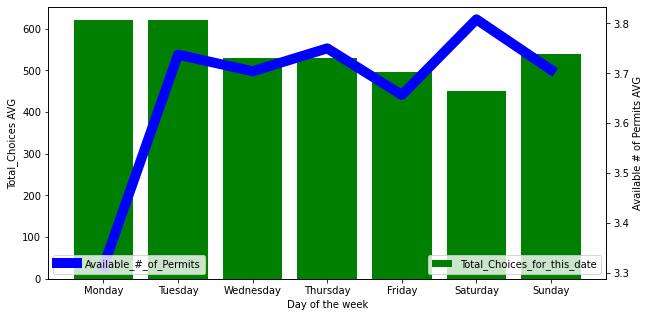

In [595]:
fig, ax = plt.subplots(figsize = (10, 5))

ax2 = ax.twinx()
ax2.plot(DayData['Day_of_week'], DayData['Available_#_of_Permits'], color = 'b', linewidth=10, label ='Available_#_of_Permits')
ax.bar(DayData['Day_of_week'], DayData['Total_Choices AVG'], color = 'g', label = 'Total_Choices_for_this_date')
ax.set_xlabel('Day of the week')
ax2.set_ylabel('Available # of Permits AVG')
ax.set_ylabel('Total_Choices AVG')
ax.legend(loc ="lower right")
ax2.legend(loc ="lower left")
plt.show()

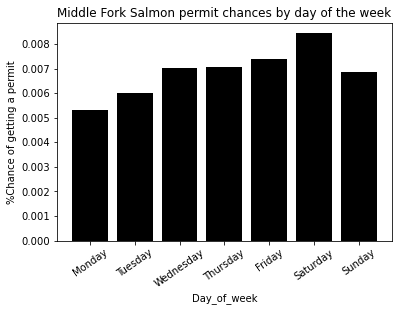

In [616]:
plt.bar(DayData['Day_of_week'], DayData['%Chance'], color = 'black')
plt.xlabel('Day_of_week')
plt.xticks(rotation=35)
plt.ylabel('%Chance of getting a permit')
plt.title("Middle Fork Salmon permit chances by day of the week")
plt.show()

In [496]:
#creating a dataframe with averages for each year on a given date.
Fullset['MFSR_Lottery_Dates']

1      2019-05-28 00:00:00
2      2019-05-29 00:00:00
3      2019-05-30 00:00:00
4      2019-05-31 00:00:00
5      2019-06-01 00:00:00
              ...         
701    2020-08-30 00:00:00
702    2020-08-31 00:00:00
703    2020-09-01 00:00:00
704    2020-09-02 00:00:00
705    2020-09-03 00:00:00
Name: MFSR_Lottery_Dates, Length: 693, dtype: object

In [498]:
#creating an index to group by
Fullset['Lottery_Day_index'] = pd.to_datetime(Fullset['MFSR_Lottery_Dates']).dt.day

In [499]:
#creating a day of the month column
Fullset['Lottery_Day'] = pd.to_datetime(Fullset['MFSR_Lottery_Dates']).dt.day

In [500]:
#creating a month of the year column
Fullset['Lottery_Month'] = pd.to_datetime(Fullset['MFSR_Lottery_Dates']).dt.month

In [501]:
Fullset['Lottery_Day']

1      28
2      29
3      30
4      31
5       1
       ..
701    30
702    31
703     1
704     2
705     3
Name: Lottery_Day, Length: 693, dtype: int64

In [502]:
Fullset['Lottery_Month']

1      5
2      5
3      5
4      5
5      6
      ..
701    8
702    8
703    9
704    9
705    9
Name: Lottery_Month, Length: 693, dtype: int64

In [503]:
Fullset['Lottery_Month'].describe()

count    693.000000
mean       6.989899
std        0.948782
min        5.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Lottery_Month, dtype: float64

In [504]:
Fullset

,MFSR_Lottery_Dates,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day_index,Lottery_Day,Lottery_Month
1,2019-05-28 00:00:00,133,29,18,34,214,4,1,28,28,5
2,2019-05-29 00:00:00,35,80,10,20,145,4,2,29,29,5
3,2019-05-30 00:00:00,50,31,75,18,174,4,3,30,30,5
4,2019-05-31 00:00:00,55,39,18,61,173,4,4,31,31,5
5,2019-06-01 00:00:00,95,48,37,20,200,4,5,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...
701,2020-08-30 00:00:00,20,12,28,46,106,5,6,30,30,8
702,2020-08-31 00:00:00,27,19,27,63,136,4,0,31,31,8
703,2020-09-01 00:00:00,38,53,65,46,202,5,1,1,1,9
704,2020-09-02 00:00:00,33,42,43,44,162,4,2,2,2,9


In [506]:
#creating a data frame for each month
September = Fullset.loc[(Fullset['Lottery_Month'] == 9)]
September

,MFSR_Lottery_Dates,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day_index,Lottery_Day,Lottery_Month
97,2019-09-01 00:00:00,39,51,48,30,168,5,6,1,1,9
98,2019-09-02 00:00:00,21,55,25,33,134,4,0,2,2,9
99,2019-09-03 00:00:00,35,10,19,30,94,6,1,3,3,9
198,2016-09-01 00:00:00,15,13,18,20,66,5,3,1,1,9
199,2016-09-02 00:00:00,2,16,9,11,38,4,4,2,2,9
200,2016-09-03 00:00:00,15,5,7,12,39,6,5,3,3,9
299,2021-09-01 00:00:00,119,116,112,98,445,4,2,1,1,9
300,2021-09-02 00:00:00,39,38,36,32,145,2,3,2,2,9
301,2021-09-03 00:00:00,47,44,43,37,171,4,4,3,3,9
400,2015-09-01 00:00:00,11,14,15,15,55,5,1,1,1,9


In [507]:
September = September.groupby(['Lottery_Day_index']).mean()

In [508]:
September

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month
Lottery_Day_index,,,,,,,,,
1,37.285714,41.857143,45.428571,35.857143,160.428571,4.857143,3.142857,1.0,9.0
2,16.428571,32.142857,24.142857,23.857143,96.571429,3.714286,3.142857,2.0,9.0
3,28.000000,16.857143,20.714286,25.714286,91.285714,5.714286,3.142857,3.0,9.0


In [509]:
August = Fullset.loc[(Fullset['Lottery_Month'] == 8)]
August

,MFSR_Lottery_Dates,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day_index,Lottery_Day,Lottery_Month
66,2019-08-01 00:00:00,181,109,151,151,592,3,3,1,1,8
67,2019-08-02 00:00:00,60,145,88,111,404,3,4,2,2,8
68,2019-08-03 00:00:00,81,69,144,75,369,4,5,3,3,8
69,2019-08-04 00:00:00,107,72,99,143,421,4,6,4,4,8
70,2019-08-05 00:00:00,111,116,118,134,479,4,0,5,5,8
...,...,...,...,...,...,...,...,...,...,...,...
698,2020-08-27 00:00:00,16,13,47,65,141,4,3,27,27,8
699,2020-08-28 00:00:00,27,28,25,41,121,4,4,28,28,8
700,2020-08-29 00:00:00,17,16,24,29,86,5,5,29,29,8
701,2020-08-30 00:00:00,20,12,28,46,106,5,6,30,30,8


In [510]:
August = August.groupby(['Lottery_Day_index']).mean()
August

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month
Lottery_Day_index,,,,,,,,,
1,155.857143,124.857143,134.571429,118.857143,534.142857,2.571429,3.142857,1.0,8.0
2,69.000000,105.000000,84.285714,93.142857,351.428571,2.571429,3.142857,2.0,8.0
3,123.571429,128.428571,150.428571,125.285714,527.714286,3.571429,2.142857,3.0,8.0
4,83.142857,92.571429,96.142857,114.142857,386.000000,3.714286,3.142857,4.0,8.0
5,83.000000,83.857143,85.571429,98.428571,350.857143,3.714286,3.142857,5.0,8.0
6,74.285714,78.571429,78.857143,81.000000,312.714286,2.857143,3.142857,6.0,8.0
7,57.714286,62.428571,65.714286,64.857143,250.714286,2.714286,3.142857,7.0,8.0
8,125.857143,113.428571,111.714286,117.142857,468.142857,4.714286,3.142857,8.0,8.0
9,61.714286,73.142857,72.142857,77.571429,284.571429,2.857143,3.142857,9.0,8.0


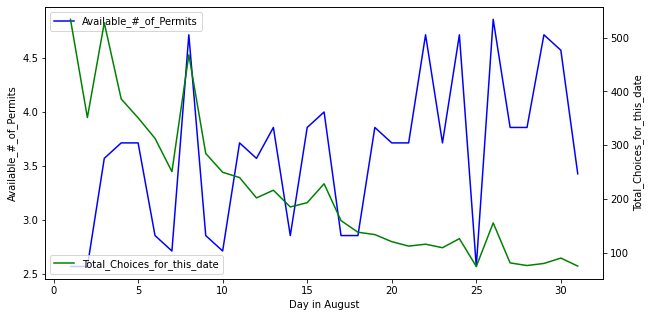

In [511]:
fig, ax = plt.subplots(figsize = (10, 5))

ax2 = ax.twinx()
ax.plot(August['Lottery_Day'], August['Available_#_of_Permits'], color = 'b', label ='Available_#_of_Permits')
ax2.plot(August['Lottery_Day'], August['Total_Choices_for_this_date'], color = 'g', label = 'Total_Choices_for_this_date')
ax.set_xlabel('Day in August')
ax.set_ylabel('Available_#_of_Permits')
ax2.set_ylabel('Total_Choices_for_this_date')
ax.legend(loc ="upper left")
ax2.legend(loc ="lower left")

In [512]:
July = Fullset.loc[(Fullset['Lottery_Month'] == 7)]

In [513]:
July = July.groupby(['Lottery_Day_index']).mean()

In [514]:
July

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month
Lottery_Day_index,,,,,,,,,
1,550.428571,378.428571,349.857143,315.285714,1594.000000,3.714286,3.142857,1.0,7.0
2,283.714286,349.571429,232.285714,222.857143,1088.428571,2.857143,3.142857,2.0,7.0
3,275.000000,286.285714,306.571429,207.857143,1075.714286,3.714286,3.142857,3.0,7.0
4,320.857143,262.142857,250.142857,291.714286,1124.857143,4.571429,3.142857,4.0,7.0
5,207.142857,180.428571,182.142857,141.000000,710.714286,2.571429,3.142857,5.0,7.0
6,421.000000,368.857143,294.285714,295.857143,1380.000000,3.571429,2.142857,6.0,7.0
7,416.000000,340.285714,245.285714,222.714286,1224.285714,4.428571,3.142857,7.0,7.0
8,292.857143,328.285714,299.142857,210.142857,1130.428571,2.714286,3.142857,8.0,7.0
9,325.142857,321.285714,294.428571,268.000000,1208.857143,3.714286,3.142857,9.0,7.0


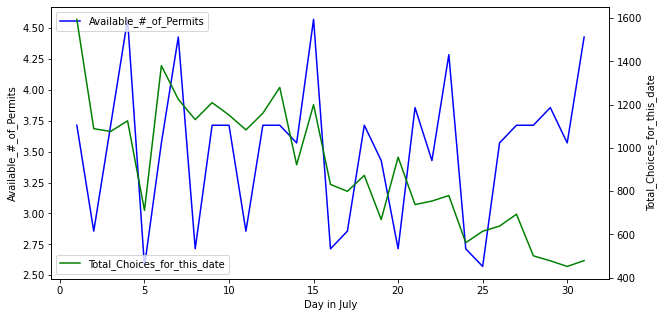

In [515]:
fig, ax = plt.subplots(figsize = (10, 5))

ax2 = ax.twinx()
ax.plot(July['Lottery_Day'], July['Available_#_of_Permits'], color = 'b', label ='Available_#_of_Permits')
ax2.plot(July['Lottery_Day'], July['Total_Choices_for_this_date'], color = 'g', label = 'Total_Choices_for_this_date')
ax.set_xlabel('Day in July')
ax.set_ylabel('Available_#_of_Permits')
ax2.set_ylabel('Total_Choices_for_this_date')
ax.legend(loc ="upper left")
ax2.legend(loc ="lower left")

In [516]:
June = Fullset.loc[(Fullset['Lottery_Month'] == 6)]
June = June.groupby(['Lottery_Day_index']).mean()
June

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month
Lottery_Day_index,,,,,,,,,
1,86.714286,50.000000,45.857143,35.142857,217.714286,3.714286,2.142857,1.0,6.0
2,49.142857,57.428571,32.000000,32.714286,171.285714,3.857143,3.142857,2.0,6.0
3,54.142857,45.285714,49.857143,34.000000,183.285714,3.857143,3.142857,3.0,6.0
4,60.428571,55.142857,43.428571,51.571429,210.571429,3.571429,3.142857,4.0,6.0
5,70.857143,52.571429,44.142857,41.571429,209.142857,3.571429,3.142857,5.0,6.0
6,67.714286,65.285714,46.142857,38.857143,218.000000,3.714286,3.142857,6.0,6.0
7,74.428571,64.571429,58.428571,54.285714,251.714286,3.714286,3.142857,7.0,6.0
8,73.285714,63.285714,52.000000,52.285714,240.857143,3.857143,2.142857,8.0,6.0
9,74.285714,73.142857,65.571429,54.285714,267.285714,3.857143,3.142857,9.0,6.0


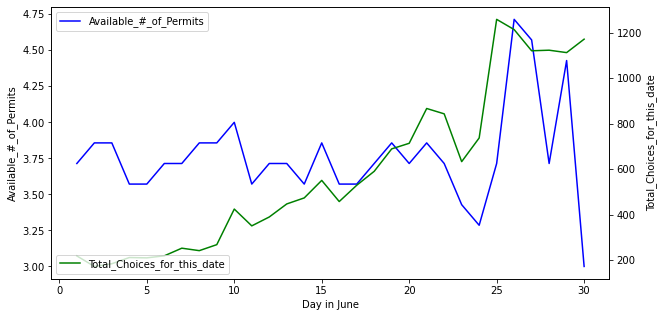

In [517]:
fig, ax = plt.subplots(figsize = (10, 5))

ax2 = ax.twinx()
ax.plot(June['Lottery_Day'], June['Available_#_of_Permits'], color = 'b', label ='Available_#_of_Permits')
ax2.plot(June['Lottery_Day'], June['Total_Choices_for_this_date'], color = 'g', label = 'Total_Choices_for_this_date')
ax.set_xlabel('Day in June')
ax.set_ylabel('Available_#_of_Permits')
ax2.set_ylabel('Total_Choices_for_this_date')
ax.legend(loc ="upper left")
ax2.legend(loc ="lower left")

In [518]:
May = Fullset.loc[(Fullset['Lottery_Month'] == 5)]
May = May.groupby(['Lottery_Day_index']).mean()
May

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month
Lottery_Day_index,,,,,,,,,
28,130.714286,72.428571,60.714286,63.142857,327.000000,3.571429,3.142857,28.0,5.0
29,33.142857,60.571429,24.857143,24.000000,142.571429,3.857143,3.142857,29.0,5.0
30,36.285714,29.714286,48.142857,22.571429,136.714286,3.571429,3.142857,30.0,5.0
31,45.571429,42.142857,33.142857,52.142857,173.000000,3.857143,3.142857,31.0,5.0


In [519]:
Day_month_avg = pd.concat([May, June, July, August, September])
Day_month_avg

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month
Lottery_Day_index,,,,,,,,,
28,130.714286,72.428571,60.714286,63.142857,327.000000,3.571429,3.142857,28.0,5.0
29,33.142857,60.571429,24.857143,24.000000,142.571429,3.857143,3.142857,29.0,5.0
30,36.285714,29.714286,48.142857,22.571429,136.714286,3.571429,3.142857,30.0,5.0
31,45.571429,42.142857,33.142857,52.142857,173.000000,3.857143,3.142857,31.0,5.0
1,86.714286,50.000000,45.857143,35.142857,217.714286,3.714286,2.142857,1.0,6.0
...,...,...,...,...,...,...,...,...,...
30,18.714286,20.571429,21.571429,29.000000,89.857143,4.571429,3.142857,30.0,8.0
31,14.142857,15.285714,17.714286,27.857143,75.000000,3.428571,2.142857,31.0,8.0
1,37.285714,41.857143,45.428571,35.857143,160.428571,4.857143,3.142857,1.0,9.0


In [520]:
#creating a % chance column
Day_month_avg['%chance'] = Day_month_avg['Available_#_of_Permits']/Day_month_avg['Total_Choices_for_this_date']

In [521]:
Day_month_avg

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month,%chance
Lottery_Day_index,,,,,,,,,,
28,130.714286,72.428571,60.714286,63.142857,327.000000,3.571429,3.142857,28.0,5.0,0.010922
29,33.142857,60.571429,24.857143,24.000000,142.571429,3.857143,3.142857,29.0,5.0,0.027054
30,36.285714,29.714286,48.142857,22.571429,136.714286,3.571429,3.142857,30.0,5.0,0.026123
31,45.571429,42.142857,33.142857,52.142857,173.000000,3.857143,3.142857,31.0,5.0,0.022296
1,86.714286,50.000000,45.857143,35.142857,217.714286,3.714286,2.142857,1.0,6.0,0.017060
...,...,...,...,...,...,...,...,...,...,...
30,18.714286,20.571429,21.571429,29.000000,89.857143,4.571429,3.142857,30.0,8.0,0.050874
31,14.142857,15.285714,17.714286,27.857143,75.000000,3.428571,2.142857,31.0,8.0,0.045714
1,37.285714,41.857143,45.428571,35.857143,160.428571,4.857143,3.142857,1.0,9.0,0.030276


In [522]:
Day_month_avg['%chance'].max()

0.06259780907668232

In [523]:
#finding most likely day to get a permit
Day_month_avg.loc[(Day_month_avg['%chance'] == 0.06259780907668232)]

,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month,%chance
Lottery_Day_index,,,,,,,,,,
3,28.0,16.857143,20.714286,25.714286,91.285714,5.714286,3.142857,3.0,9.0,0.062598


In [525]:
#cleaning the dataset up
Dates_plot= Day_month_avg[['Lottery_Day', 'Lottery_Month', '%chance', 'Available_#_of_Permits', 'Total_Choices_for_this_date']]
Dates_plot

,Lottery_Day,Lottery_Month,%chance,Available_#_of_Permits,Total_Choices_for_this_date
Lottery_Day_index,,,,,
28,28.0,5.0,0.010922,3.571429,327.000000
29,29.0,5.0,0.027054,3.857143,142.571429
30,30.0,5.0,0.026123,3.571429,136.714286
31,31.0,5.0,0.022296,3.857143,173.000000
1,1.0,6.0,0.017060,3.714286,217.714286
...,...,...,...,...,...
30,30.0,8.0,0.050874,4.571429,89.857143
31,31.0,8.0,0.045714,3.428571,75.000000
1,1.0,9.0,0.030276,4.857143,160.428571


In [526]:
#examining top 50 dates
Dates_plot.sort_values('%chance').tail(50)
#Dates_plot.tail(20)

,Lottery_Day,Lottery_Month,%chance,Available_#_of_Permits,Total_Choices_for_this_date
Lottery_Day_index,,,,,
29,29.0,7.0,0.008077,3.857143,477.571429
13,13.0,6.0,0.008317,3.714286,446.571429
6,6.0,8.0,0.009137,2.857143,312.714286
31,31.0,7.0,0.009256,4.428571,478.428571
10,10.0,6.0,0.009434,4.000000,424.000000
12,12.0,6.0,0.009545,3.714286,389.142857
4,4.0,8.0,0.009623,3.714286,386.000000
9,9.0,8.0,0.010040,2.857143,284.571429
8,8.0,8.0,0.010070,4.714286,468.142857


In [528]:
#finding the best chance to get a permit in the best months

Day_month_avg.loc[(Day_month_avg['Lottery_Month'] == 6) | (Day_month_avg['Lottery_Month'] == 7)].sort_values('%chance').tail(30)



,First_Choice,2nd_Choice,3rd_Choice,4th_Choice,Total_Choices_for_this_date,Available_#_of_Permits,Day_of_week,Lottery_Day,Lottery_Month,%chance
Lottery_Day_index,,,,,,,,,,
19,174.285714,185.571429,167.714286,140.571429,668.142857,3.428571,3.142857,19.0,7.0,0.005131
20,216.428571,197.571429,169.857143,129.857143,713.714286,3.714286,3.142857,20.0,6.0,0.005204
21,172.142857,193.571429,186.000000,185.857143,737.571429,3.857143,3.142857,21.0,7.0,0.005230
27,161.571429,188.857143,170.285714,172.142857,692.857143,3.714286,2.142857,27.0,7.0,0.005361
23,186.714286,189.285714,144.571429,112.285714,632.857143,3.428571,3.142857,23.0,6.0,0.005418
23,210.285714,206.285714,189.142857,173.571429,779.285714,4.285714,3.142857,23.0,7.0,0.005500
26,168.428571,162.571429,148.285714,158.857143,638.142857,3.571429,3.142857,26.0,7.0,0.005597
19,213.142857,192.142857,151.571429,132.285714,689.142857,3.857143,3.142857,19.0,6.0,0.005597
18,184.857143,164.428571,131.571429,109.428571,590.285714,3.714286,3.142857,18.0,6.0,0.006292


In [529]:
#Data From 
#https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customWaterYearGroupByMonthReport/monthly/start_of_period/620:ID:SNTL|id=%22%22|name/POR_BEGIN,POR_END:M|1,M|2,M|3,M|10,M|11,M|12/WTEQ::value

In [530]:
#creating a decision tree to determine the water level for june and july



Snow_depth_train_list = [[2001,0.0,2.8,4.1,5.6,6.5,7.1],
[2002,0.0,1.1,3.1,6.4,9.6,11.3],
[2003,0.0,0.7,1.9,4.8,8.0,10.5],
[2004,0.0,0.1,3.3,7.1,9.7,13.4],
[2005,0.0,2.6,2.9,5.7,6.9,7.8],
[2006,0.0,0.4,3.8,7.6,11.7,14.5],
[2007,0.0,1.0,3.1,6.5,7.5,10.4],
[2008,0.3,2.1,3.5,7.1,11.2,14.0],
[2009,0.0,0.0,1.9,6.4,8.9,10.3],
[2010,0.3,2.3,3.4,4.9,6.6,7.4],
[2000,0.0,0.6,2.1,5.5,9.7,12.3],
[2011,0.0,1.4,4.4,8.5,11.0,13.0],
[2012,0.0,0.5,2.7,5.0,7.7,10.3],
[2013,0.0,1.0,4.6,9.1,10.9,12.4],
[2014,1.7,2.6,4.5,7.0,9.9,15.1],
[2015,0.0,0.2,3.0,6.6,8.4,10.6]]

Snow_depth_test_list =[[2016,0.0,0.6,2.9,7.5,10.1,11.3],
[2017,0.0,0.0,1.6,6.9,9.9,17.8],
[2018,0.0,0.4,4.7,7.3,10.4,13.1],
[2019,0.0,0.1,1.8,3.9,5.9,13.5],
[2020,1.0,1.9,2.8,4.9,8.1,10.9]]

In [418]:
Snow_depth_train = pd.DataFrame(Snow_depth_train_list, columns = ['Year','Oct','Nov','Dec','Jan','Feb','Mar'])
Snow_depth_train



,Year,Oct,Nov,Dec,Jan,Feb,Mar
0,2001,0.0,2.8,4.1,5.6,6.5,7.1
1,2002,0.0,1.1,3.1,6.4,9.6,11.3
2,2003,0.0,0.7,1.9,4.8,8.0,10.5
3,2004,0.0,0.1,3.3,7.1,9.7,13.4
4,2005,0.0,2.6,2.9,5.7,6.9,7.8
5,2006,0.0,0.4,3.8,7.6,11.7,14.5
6,2007,0.0,1.0,3.1,6.5,7.5,10.4
7,2008,0.3,2.1,3.5,7.1,11.2,14.0
8,2009,0.0,0.0,1.9,6.4,8.9,10.3
9,2010,0.3,2.3,3.4,4.9,6.6,7.4


In [419]:
Snow_depth_test = pd.DataFrame(Snow_depth_test_list, columns = ['Year','Oct','Nov','Dec','Jan','Feb','Mar'])
Snow_depth_test

,Year,Oct,Nov,Dec,Jan,Feb,Mar
0,2016,0.0,0.6,2.9,7.5,10.1,11.3
1,2017,0.0,0.0,1.6,6.9,9.9,17.8
2,2018,0.0,0.4,4.7,7.3,10.4,13.1
3,2019,0.0,0.1,1.8,3.9,5.9,13.5
4,2020,1.0,1.9,2.8,4.9,8.1,10.9


In [420]:
#00060, Discharge, cubic feet per second,
#YEAR	Monthly mean in ft3/s   (Calculation Period: 1973-04-01 -> 2021-04-30)
#Jan	Feb	Mar	Apr	May	Jun	Jul	Aug	Sep	Oct	Nov	Dec
CFS_Monthly_avg_train_list = [[2000,496.1,502.8,588.2,2061,4203,2709,895.2,530,529.1,516.6,423.6,412.8],
[2001,360,376.3,447.7,688.5,2025,1038,541.7,369.9,365,412.5,467.2,372.6],
[2002,353.2,347.1,405.3,1562,3616,3405,1071,603.4,493.2,441.7,422.4,407.3],
[2003,436.1,510.8,602.4,1473,4592,5011,1181,682.1,534,467.4,433.9,450.7],
[2004,405.4,413.4,798.9,1821,3404,2634,1064,688.2,618.9,538,478.9,420.1],
[2005,424.3,386.2,505.6,1080,3951,2606,1071,584.2,490.1,480.5,498.1,550.1],
[2006,545.3,437.4,519.5,2176,8361,5368,1461,767.1,621.8,586.1,811.1,574.4],
[2007,494.2,480.1,1019,1986,4206,1868,746.3,513.7,493.7,681.3,800.7,581.6],
[2008,469.9,476.7,544.1,1052,6742,5187,1717,806.8,622.5,557.3,631.1,483.1],
[2009,453.2,452.5,551.9,1658,5880,4891,1464,853.2,642.3,718.2,618,449.9],
[2010,479.5,443.1,497.5,1306,2564,5801,1563,839.4,671.6,657.4,642.8,577.8],
[2011,555.3,509,544.7,1012,4951,8035,3328,1109,768.7,792.4,633.5,517.8],
[2012,542.4,497.9,764.4,3573,6296,4988,1838,930.5,697.7,730,755.1,913.5],
[2013,592.9,570.4,704.2,1883,4815,2353,982,619.4,669.6,895.6,628.6,493.4],
[2014,491.7,532.2,930.8,2148,6539,4205,1471,947.5,680.8,699,677.4,600],
[2015,574.7,865.1,1291,2124,3330,1722,853.4,569.8,530.8,485.3,492,558.8]]

CFS_Monthly_avg_test_list = [[2016,479.2,561.7,929.5,3814,5585,2902,1110,672.6,572.8,758,807.9,540.4],
[2017,506.3,876,2335,3052,9832,9438,2527,1148,968.7,935.2,1300,950.4],
[2018,693,700.2,755.4,2931,7910,3393,1280,799.6,645.5,651.1,576,469.9],
[2019,468.4,465.6,526.6,2753,6052,4466,1316,744.9,615.4,584.5,489.5,452.5],
[2020,419.3,389,494.5,1482,4575,3591,1394,769.8,625.7,617,539.6,500.3]]

In [421]:
#[1999,780.6,1780,5497,7114,2109,984,622.1,596.9,609.9,467.9],
#[2021,502.6,433.8,560.8,1,451]
#[1982,0.0,1.1,5.2,12.0,17.3,20.1],
#[1983,0.3,1.1,3.7,10.4,13.0,17.1],
#[1984,0.0,0.0,5.0,8.6,10.0,12.5],
#[1985,0.0,2.6,7.4,9.2,9.3,12.3],
#[1986,0.0,1.9,4.8,6.2,9.0,15.0],
#[1987,0.8,0.3,4.6,5.1,7.3,9.2],
#[1988,0.0,0.0,1.1,5.3,8.3,10.6],
#[1989,0.0,0.0,5.0,6.6,10.5,11.6],
#[1990,0.0,2.2,3.3,5.0,9.8,11.2],
#[1991,0.0,0.6,2.9,5.7,7.3,7.6],
#[1992,0.0,1.9,4.9,6.9,7.7,10.0],
#[1993,0.0,0.5,2.3,7.5,10.5,12.0],
#[1994,0.0,0.2,0.6,3.3,5.3,9.4],
#[1995,0.0,1.6,5.1,7.6,12.8,13.9],
#[1996,0.3,0.6,5.3,9.8,13.7,16.6],
#[1997,0.0,1.9,7.1,15.3,20.7,22.2],
#[1998,0.0,2.0,3.0,4.1,8.8,10.8],
#[1999,0.0,0.2,6.0,10.6,13.1,18.7],

In [422]:
CFS_Monthly_avg_train = pd.DataFrame(CFS_Monthly_avg_train_list)
CFS_Monthly_avg_train.columns = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
CFS_Monthly_avg_train

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,496.1,502.8,588.2,2061.0,4203,2709,895.2,530.0,529.1,516.6,423.6,412.8
1,2001,360.0,376.3,447.7,688.5,2025,1038,541.7,369.9,365.0,412.5,467.2,372.6
2,2002,353.2,347.1,405.3,1562.0,3616,3405,1071.0,603.4,493.2,441.7,422.4,407.3
3,2003,436.1,510.8,602.4,1473.0,4592,5011,1181.0,682.1,534.0,467.4,433.9,450.7
4,2004,405.4,413.4,798.9,1821.0,3404,2634,1064.0,688.2,618.9,538.0,478.9,420.1
5,2005,424.3,386.2,505.6,1080.0,3951,2606,1071.0,584.2,490.1,480.5,498.1,550.1
6,2006,545.3,437.4,519.5,2176.0,8361,5368,1461.0,767.1,621.8,586.1,811.1,574.4
7,2007,494.2,480.1,1019.0,1986.0,4206,1868,746.3,513.7,493.7,681.3,800.7,581.6
8,2008,469.9,476.7,544.1,1052.0,6742,5187,1717.0,806.8,622.5,557.3,631.1,483.1
9,2009,453.2,452.5,551.9,1658.0,5880,4891,1464.0,853.2,642.3,718.2,618.0,449.9


In [423]:
CFS_Monthly_avg_test = pd.DataFrame(CFS_Monthly_avg_test_list)
CFS_Monthly_avg_test.columns = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
CFS_Monthly_avg_test

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,479.2,561.7,929.5,3814,5585,2902,1110,672.6,572.8,758.0,807.9,540.4
1,2017,506.3,876.0,2335.0,3052,9832,9438,2527,1148.0,968.7,935.2,1300.0,950.4
2,2018,693.0,700.2,755.4,2931,7910,3393,1280,799.6,645.5,651.1,576.0,469.9
3,2019,468.4,465.6,526.6,2753,6052,4466,1316,744.9,615.4,584.5,489.5,452.5
4,2020,419.3,389.0,494.5,1482,4575,3591,1394,769.8,625.7,617.0,539.6,500.3


In [424]:
CFS_Monthly_avg_train.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000
mean,2007.500000,479.637500,487.562500,669.700000,1725.218750,4717.187500,3863.812500,1327.975000,713.387500,589.362500,603.706250,588.4000,522.743750
std,4.760952,72.125667,117.333558,239.141542,677.918849,1682.837375,1868.926545,644.753316,192.671412,103.280272,139.715026,132.2617,126.838065
min,2000.000000,353.200000,347.100000,405.300000,688.500000,2025.000000,1038.000000,541.700000,369.900000,365.000000,412.500000,422.4000,372.600000
25%,2003.750000,433.150000,431.400000,516.025000,1249.500000,3563.000000,2542.750000,960.300000,580.600000,520.250000,484.100000,475.9750,442.450000
50%,2007.500000,485.600000,478.400000,570.050000,1739.500000,4399.000000,3805.000000,1126.000000,685.150000,620.350000,571.700000,623.3000,505.600000
75%,2011.250000,543.125000,509.450000,773.025000,2076.750000,5984.000000,5055.000000,1494.000000,842.850000,670.100000,703.800000,651.4500,575.250000
max,2015.000000,592.900000,865.100000,1291.000000,3573.000000,8361.000000,8035.000000,3328.000000,1109.000000,768.700000,895.600000,811.1000,913.500000


In [552]:
import pandas as pd
import numpy as np

# Loading our machine learning library from Scikit Learn
from sklearn.tree import DecisionTreeRegressor

# Loading mean absolute error
from sklearn.metrics import mean_absolute_error

# Loading test/train/split library
from sklearn.model_selection import train_test_split

In [553]:
#setting Y value
y = CFS_Monthly_avg_train.Jun

In [568]:
#setting x value
x = Snow_depth_train
x.describe()

,Year,Oct,Nov,Dec,Jan,Feb,Mar
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.00000
mean,2007.500000,0.143750,1.212500,3.26875,6.487500,9.012500,11.27500
std,4.760952,0.427346,0.966695,0.86850,1.241437,1.705237,2.45642
min,2000.000000,0.000000,0.000000,1.90000,4.800000,6.500000,7.10000
25%,2003.750000,0.000000,0.475000,2.85000,5.575000,7.650000,10.30000
50%,2007.500000,0.000000,1.000000,3.20000,6.450000,9.250000,10.95000
75%,2011.250000,0.000000,2.150000,3.87500,7.100000,10.150000,13.10000
max,2015.000000,1.700000,2.800000,4.60000,9.100000,11.700000,15.10000


In [569]:
#creating decision tree
CFS_model = DecisionTreeRegressor(random_state = 0)

CFS_model.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [570]:
#making perdictions for training set should be perfectly accurate
CFS_model.predict(x)

array([2709., 1038., 3405., 5011., 2634., 2606., 5368., 1868., 5187.,
       4891., 5801., 8035., 4988., 2353., 4205., 1722.])

In [571]:
x.head

<bound method NDFrame.head of     Year  Oct  Nov  Dec  Jan   Feb   Mar
0   2001  0.0  2.8  4.1  5.6   6.5   7.1
1   2002  0.0  1.1  3.1  6.4   9.6  11.3
2   2003  0.0  0.7  1.9  4.8   8.0  10.5
3   2004  0.0  0.1  3.3  7.1   9.7  13.4
4   2005  0.0  2.6  2.9  5.7   6.9   7.8
5   2006  0.0  0.4  3.8  7.6  11.7  14.5
6   2007  0.0  1.0  3.1  6.5   7.5  10.4
7   2008  0.3  2.1  3.5  7.1  11.2  14.0
8   2009  0.0  0.0  1.9  6.4   8.9  10.3
9   2010  0.3  2.3  3.4  4.9   6.6   7.4
10  2000  0.0  0.6  2.1  5.5   9.7  12.3
11  2011  0.0  1.4  4.4  8.5  11.0  13.0
12  2012  0.0  0.5  2.7  5.0   7.7  10.3
13  2013  0.0  1.0  4.6  9.1  10.9  12.4
14  2014  1.7  2.6  4.5  7.0   9.9  15.1
15  2015  0.0  0.2  3.0  6.6   8.4  10.6>

In [572]:
CFS_model.predict(x.head(5))

array([2709., 1038., 3405., 5011., 2634.])

In [573]:
CFS_Monthly_avg_train['Jun'].head(5)

0    2709
1    1038
2    3405
3    5011
4    2634
Name: Jun, dtype: int64

In [574]:
#using snow depth test to test model accuracy
predictions = CFS_model.predict(Snow_depth_test)
predictions

array([1722., 5187., 5011., 5187., 3405.])

In [575]:
#can see the predictions are a bit off
val_y = CFS_Monthly_avg_test.Jun
val_y

0    2902
1    9438
2    3393
3    4466
4    3591
Name: Jun, dtype: int64

In [576]:
#calculating mean absolute error
print(mean_absolute_error(val_y, predictions))

1591.2


In [577]:
CFS_Monthly_avg_test.Jun.mean()
#The model error is large compared to the average cfs flow in June.

4758.0

In [578]:
#creating a decision tree for july
y2 = CFS_Monthly_avg_train.Jul


In [579]:
CFS_model = DecisionTreeRegressor(random_state = 0)

CFS_model.fit(x,y2)

DecisionTreeRegressor(random_state=0)

In [580]:
predictions = CFS_model.predict(Snow_depth_test)

In [581]:
val_y2 = CFS_Monthly_avg_test.Jul

In [582]:
print(mean_absolute_error(val_y2, predictions))

353.8


In [583]:
CFS_Monthly_avg_test.Jul.mean()

1525.4

In [584]:
352.8/1525.4

0.2312835977448538

In [585]:
1591.2/4758.0

0.3344262295081967

In [ ]:
"""
Takeaways
Saturday is the best day of the week to apply.
To determine what is the best day to apply, I will use the snow depth decision tree to predict the water level for
June and July (best months to be out in the sun). This will help determine if the water will be too high in june or too low in july.
This will help narrow down the window of dates. Then I can use the two dataframes to select the day that has the highest chance of
receiving a permit.
"""